## Exercise 1 (0 points)

Please carefully read the instructions on how to use Jupyter Notebooks and how to hand in the assignments.

## Exercise 2 (4 = 1+1+2 points)

The **Mandelbrot distribution** is a power-law distribution over ranked data.
\begin{equation}
f(r) \propto \frac{m}{(c+r)^B}
\end{equation}
Here $r$ is the rank of the data point and $c$ and $B$ are the parameters that define the distribution. $m$ is a normalizing constant ensuring that the distribution is a true probability distribution.

**Zipf's** law or rather the Zipfian distribution is a special case of the Mandelbrot distribution. It holds that the relative frequency of a word in a corpus is inversely proportional to its rank in the frequency table.

1. Which values for $m$, $c$ yield the Zipfian distribution? Explain how you arrived at these values. Show the result in the form of a $\LaTeX$ formula. What is a reasonable value for $B$? (1 Point)

2. Look again at Chapter 2, Slide 16. Why do the parameters of the distribution ($m$, $c$, $B$) differ in practice, i. e. for a real language, whether natural or artificial, from those obtained in 1.? (1 Point)

3. The so-called stick-breaking process is a notion of the [Dirichlet process](https://en.wikipedia.org/wiki/Dirichlet_process#The_stick-breaking_process). (the following [blog post](https://medium.com/@albertoarrigoni/dirichlet-processes-917f376b02d2) gives a nice introduction into the Dirichlet process, you should at least read the part concerned with stick-breaking).
The function `stick_breaking` in the code cell below draws a sample from a stick-breaking process with intensity $\alpha$.
  * Choose a suitable value of $\alpha$ such that the distribution follows Zipf's law, and explain how $\alpha$ affects the distribution.
  * Sample 100 values from the distribution, and plot them on log scale along with the 'ideal' Zipfian distribution obtained in 1. You will have to adjust the exponent $B$ such that it matches the distribution. The plotting code should be added to and imported from `exercise_2.py`. If you make changes to the code block below, please comment on why it was necessary.
  * Relate to your findings in 2.

## Exercise 2 : Answers

1. Zipf's law state that given a large sample of words used, the frequency of any word is inversly propotional to its rank in the frequency table:
\begin{equation}
f(r) \propto \frac{1}{r}
\end{equation}
We know Mandelbrot distribution as following:
\begin{equation}
f(r) \propto \frac{m}{(c+r)^B}
\end{equation}
To make Mandelbrot distribution equal to zipf's law, we have to substitute the values m = 1, B = 1, c = 0 in it.

2.  It is possible that frequency of words does not always follow Zipf's law as there can be variations. We need different values for parameters ($m$, $c$, $B$) in order to model the distribution and allow better fit for the frequent and rare words.

3. Suitable value for $\alpha$ in our case is 3. Less value of $\alpha$ will leave less of the stick for subsequent values resulting in concentrated distribution.

By adjusting the value of B, we are able to bring distribution closer to Zipf's law at higher ranks.

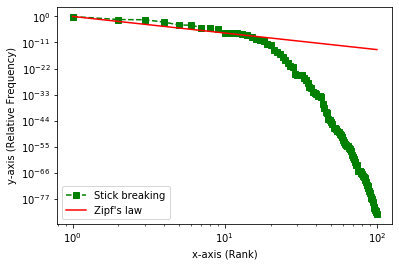

In [ ]:
# derive Zipfian law from Mandlebort
from importlib import reload
import exercise_2
exercise_2 = reload(exercise_2)

n = 100
alpha = 3 # TODO: choose alpha
B = 7 # TODO: choose B

stick_lengths = exercise_2.stick_breaking(n, alpha)
exercise_2.plot_stick_lengths(stick_lengths, alpha, B) #TODO: in exercise_2.py

## Exercise 3 (6 = 3+0.5+1+0.5+1 points)

The following cell executes the function `analysis` from the `exercise_3.py` file. You are given a tokenized input (list of words).

1. Plot the frequencies against rank for the inputs (different languages) along with an 'ideal' curve according to the Zipf's law. Use the log-log scale. (3 points)

Then, answer the following questions and elaborate:

2. Does Zipf's law form an accurate prediction of your data? (0.5 point)
3. What are the differences between the languages? What causes them? (1 point)
4. In your plot, what causes the vertical gaps ("steps") for high-rank words  (rightmost)? (0.5 point)
5. Zipf's law "predicts" the frequency of the n-th rank word. Compute the mean squared error of these predictions $\big(\frac{1}{n} \sum (\hat{y} - y)^2\big)$, and output the value to 10 decimal digits. (1 point)

Please extend `exercise_3.py`. Ideally the following cell remains unchanged and outputs your code. If you make changes, please comment on why it was necessary.

## Exercise 3 : Answers

2. Zipf's law does not form an accurate prediction of the data as the there is a huge gap between the lowest and the highest rank of the word.

3. The difference between the languages is the types of character which are used in those languages. English has alphabets, numerical digits and special characters, whereas in German Language other special alphabets like eszett, umlaut and so on. In Python there are a lot of other characters which are called tokens which are a combination of the characters of English Language but give a different outcome.

4. In the loglog Plot, the vertical gap is because of the inconsistence of the words, some words have extremely high ooccurrence like 'the', 'and', 'to', 'a' and so on in English, like 'sie', 'und', 'die', 'der' and so on in German, while '.', 'self', '(', ')' and so on in Python. whereas some words have infrequent occurence.

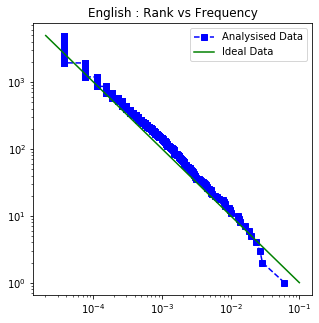

The Mean Squared Error for English language is = 28.5933273370


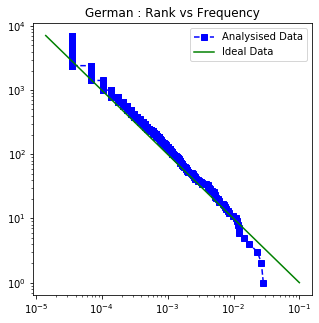

The Mean Squared Error for German language is = 16.3760053420


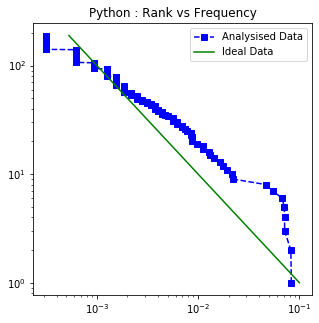

The Mean Squared Error for Python language is = 287.2040554452


In [ ]:
import tokenize
from importlib import reload
import exercise_3
exercise_3 = reload(exercise_3)

# run on English text
with open("data/alice_in_wonderland.txt", "r") as f:
    exercise_3.analysis("English", f.read().lower().split())

# run on German text
with open("data/alice_im_wunderland.txt", "r") as f:
    exercise_3.analysis("German", f.read().lower().split())

# run on PyTorch source
with open("data/torch_activation.py", "r") as f:
    tokens = [
        x.string
        for x in tokenize.generate_tokens(f.readline)
        if x.type not in {
            tokenize.COMMENT, tokenize.STRING, tokenize.INDENT, tokenize.DEDENT, tokenize.NEWLINE
        }
    ]
    exercise_3.analysis("Python", tokens)

# Bonus (1 point)

Repeat exercise 3 but on the character level (as opposed to word level). Your analysis can be much shorter but comment on the differences between the languages. You have to, however, write your own loader similar to the one we provided. For this, you may create a file `bonus.py` and import your code from there in a similar fashion to the above questions.

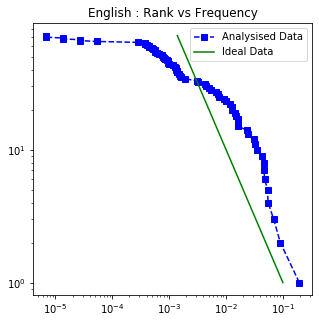

The Mean Squared Error for English language is = 4258146.8904606905


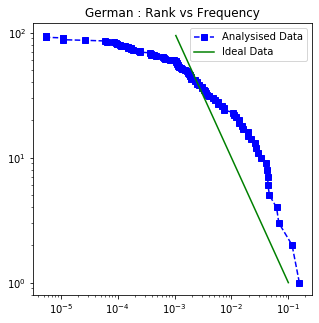

The Mean Squared Error for German language is = 3741944.0848629060


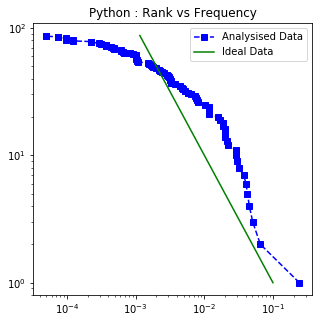

The Mean Squared Error for Python language is = 221678.6167304686


In [ ]:
import tokenize
from importlib import reload
import BonusExercise
BonusExercise = reload(BonusExercise)

# run on English text
with open("data/alice_in_wonderland.txt", "r") as f:
    file_to_string = f.read()
    BonusExercise.analysis("English", file_to_string)

# run on German text
with open("data/alice_im_wunderland.txt", "r") as f:
    file_to_string = f.read()
    BonusExercise.analysis("German", file_to_string)

# run on PyTorch source
with open("data/torch_activation.py", "r") as f:
    file_to_string = f.read()
    BonusExercise.analysis("Python", file_to_string)